In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
djia=pd.read_csv('/content/DJIA_09_20.csv')
test_djia=djia[(djia['Date']>='2016-01-01') & (djia['Date']<='2020-05-08')]
test_djia=test_djia.reset_index(drop=True)

In [4]:
test_djia

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000
...,...,...,...,...,...,...,...
1090,2020-05-04,23581.550781,23769.560547,23361.160156,23749.759766,23749.759766,355360000
1091,2020-05-05,23958.880859,24169.720703,23868.910156,23883.089844,23883.089844,369710000
1092,2020-05-06,23978.880859,24054.589844,23661.140625,23664.640625,23664.640625,377450000
1093,2020-05-07,23837.210938,24094.619141,23834.390625,23875.890625,23875.890625,369890000


In [5]:
test_djia['daily_return']=test_djia['Adj Close'].pct_change(1)

In [6]:
def backtest_strat(df):
    strategy_ret=df.copy()
    strategy_ret['Date']=pd.to_datetime(strategy_ret['Date'])
    strategy_ret.set_index('Date',drop=False,inplace=True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

In [7]:
dow_strat=backtest_strat(test_djia)

In [8]:
df=pd.read_csv('/content/dow_30_2009_2020.csv')

In [9]:
df

,Unnamed: 0,datadate,tic,prccd,ajexdi,prcod,prchd,prcld,cshtrd
0,0,20090102,AXP,19.33,1.0,18.57,19.52,18.400,10955620.0
1,1,20090105,AXP,19.95,1.0,19.20,20.24,19.000,16019130.0
2,2,20090106,AXP,21.07,1.0,20.30,21.38,20.010,13819380.0
3,3,20090107,AXP,20.01,1.0,20.53,20.72,19.830,15699820.0
4,4,20090108,AXP,20.04,1.0,19.80,20.17,19.400,12255070.0
...,...,...,...,...,...,...,...,...,...
87775,108896,20200811,V,197.77,1.0,197.82,202.89,196.335,11547450.0
87776,108897,20200812,V,198.74,1.0,199.00,200.23,198.240,5432344.0
87777,108898,20200813,V,197.58,1.0,197.13,199.94,197.030,6970576.0
87778,108899,20200814,V,196.64,1.0,197.01,198.07,195.770,5012497.0


In [10]:
len(df.tic.unique())

30

In [11]:
df.tic.value_counts()

,count
tic,
AXP,2926
AAPL,2926
GS,2926
TRV,2926
CSCO,2926
MSFT,2926
WBA,2926
WMT,2926
RTX,2926


In [12]:
row=df[(df['datadate']==20100104) & (df['tic']=='AXP')]
print(row)

     Unnamed: 0  datadate  tic  prccd  ajexdi  prcod  prchd  prcld     cshtrd
252         252  20100104  AXP  40.92     1.0  40.81   41.1  40.39  6872282.0


In [13]:
df.sort_values(['datadate','tic']).head()

,Unnamed: 0,datadate,tic,prccd,ajexdi,prcod,prchd,prcld,cshtrd
2926,2926,20090102,AAPL,90.75,7.0,85.88,91.04,85.16,26641980.0
0,0,20090102,AXP,19.33,1.0,18.57,19.52,18.40,10955620.0
8778,8778,20090102,BA,45.25,1.0,42.80,45.56,42.78,7010171.0
11704,11704,20090102,CAT,46.91,1.0,44.91,46.98,44.71,7116726.0
76076,91358,20090102,CSCO,16.96,1.0,16.41,17.00,16.25,40977480.0


In [14]:
df

,Unnamed: 0,datadate,tic,prccd,ajexdi,prcod,prchd,prcld,cshtrd
0,0,20090102,AXP,19.33,1.0,18.57,19.52,18.400,10955620.0
1,1,20090105,AXP,19.95,1.0,19.20,20.24,19.000,16019130.0
2,2,20090106,AXP,21.07,1.0,20.30,21.38,20.010,13819380.0
3,3,20090107,AXP,20.01,1.0,20.53,20.72,19.830,15699820.0
4,4,20090108,AXP,20.04,1.0,19.80,20.17,19.400,12255070.0
...,...,...,...,...,...,...,...,...,...
87775,108896,20200811,V,197.77,1.0,197.82,202.89,196.335,11547450.0
87776,108897,20200812,V,198.74,1.0,199.00,200.23,198.240,5432344.0
87777,108898,20200813,V,197.58,1.0,197.13,199.94,197.030,6970576.0
87778,108899,20200814,V,196.64,1.0,197.01,198.07,195.770,5012497.0


In [15]:
#from finrl.meta.preprocessor.preprocessors import FeatureEngineer

In [16]:
!pip install ta
import ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=1fa39d5d60b35e8edb7dc883a3c003436d6adecb29f6b9f404356a6a00a9b203
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [17]:
df['macd']=ta.trend.MACD(df['prccd']).macd()

In [18]:
df['rsi_30']=ta.momentum.rsi(df['prccd'])
df['cci_30']=ta.trend.cci(df['prchd'], df['prcld'], df['prccd'], window=30)
df['adx_30']=ta.trend.adx(df['prchd'], df['prcld'], df['prccd'], window=30)

In [19]:
from scipy.spatial.distance import mahalanobis

In [20]:

df_pivot = df.pivot(index='datadate', columns='tic', values='prccd')

#log returns
returns = np.log(df_pivot / df_pivot.shift(1)).dropna()

def calculate_turbulence_index(returns, window=20):
    turbulence_index = []
    for i in range(window, len(returns)):
        window_returns = returns[i-window:i]
        mean_return = window_returns.mean()
        cov_matrix = window_returns.cov()
        inv_cov_matrix = np.linalg.pinv(cov_matrix)
        current_return = returns.iloc[i]
        distance = mahalanobis(current_return, mean_return, inv_cov_matrix)
        turbulence_index.append(distance)

    #NaNs for the initial periods where turbulence index cannot be calculated
    return [np.nan] * window + turbulence_index

turbulence_index = calculate_turbulence_index(returns)

# Ensure the length matches the index length
turbulence_index = pd.Series(turbulence_index, index=returns.index)

df_pivot['turbulence_index'] = turbulence_index

In [21]:
df

,Unnamed: 0,datadate,tic,prccd,ajexdi,prcod,prchd,prcld,cshtrd,macd,rsi_30,cci_30,adx_30
0,0,20090102,AXP,19.33,1.0,18.57,19.52,18.400,10955620.0,NaN,NaN,NaN,0.000000
1,1,20090105,AXP,19.95,1.0,19.20,20.24,19.000,16019130.0,NaN,NaN,NaN,0.000000
2,2,20090106,AXP,21.07,1.0,20.30,21.38,20.010,13819380.0,NaN,NaN,NaN,0.000000
3,3,20090107,AXP,20.01,1.0,20.53,20.72,19.830,15699820.0,NaN,NaN,NaN,0.000000
4,4,20090108,AXP,20.04,1.0,19.80,20.17,19.400,12255070.0,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87775,108896,20200811,V,197.77,1.0,197.82,202.89,196.335,11547450.0,0.715560,54.723823,122.749230,7.559540
87776,108897,20200812,V,198.74,1.0,199.00,200.23,198.240,5432344.0,0.891133,56.224917,118.197104,7.836951
87777,108898,20200813,V,197.58,1.0,197.13,199.94,197.030,6970576.0,0.925999,53.922525,85.242482,8.028551
87778,108899,20200814,V,196.64,1.0,197.01,198.07,195.770,5012497.0,0.867777,52.062040,41.570003,8.134613


In [22]:
df_pivot

tic,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,turbulence_index
datadate,,,,,,,,,,,,,,,,,,,,,
20090102,90.75,19.33,45.25,46.91,16.96,76.52,15.41,23.92,86.76,24.13,...,62.80,54.95,45.20,27.59,53.44,34.64,25.550,57.18,81.64,NaN
20090105,94.58,19.95,46.17,46.08,17.11,76.66,15.05,23.50,88.78,24.71,...,62.35,54.30,44.53,27.14,53.82,32.48,26.840,56.52,81.63,NaN
20090106,93.02,21.07,46.31,45.80,17.79,77.35,16.05,24.31,88.71,25.26,...,62.17,54.88,43.17,26.50,57.61,31.96,26.710,56.02,80.30,NaN
20090107,91.01,20.01,44.76,43.67,17.32,73.96,16.08,23.18,84.50,24.57,...,61.08,53.52,41.46,26.30,56.36,31.90,27.030,55.54,78.25,NaN
20090108,92.70,20.04,44.79,44.02,17.54,74.24,15.81,22.90,85.41,24.39,...,60.41,53.51,42.23,26.71,55.76,32.39,26.840,51.38,79.09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20200811,437.50,103.26,180.13,142.53,47.19,89.62,57.30,130.49,211.06,274.92,...,133.23,64.26,119.92,315.55,197.77,58.51,41.850,130.20,44.97,5.743492
20200812,452.04,101.68,175.44,142.57,48.10,90.72,58.35,131.79,212.13,281.58,...,135.46,64.29,118.86,322.27,198.74,58.60,41.820,131.89,44.09,5.454375
20200813,460.04,100.42,174.73,140.67,42.72,89.82,58.02,130.96,208.39,281.66,...,135.78,63.30,119.27,321.52,197.58,58.52,41.000,131.85,43.01,14.741091


In [23]:
df_pivot.reset_index(inplace=True)
df_final = pd.merge(df, df_pivot[['datadate', 'turbulence_index']], on='datadate', how='left')

In [24]:
df_final

,Unnamed: 0,datadate,tic,prccd,ajexdi,prcod,prchd,prcld,cshtrd,macd,rsi_30,cci_30,adx_30,turbulence_index
0,0,20090102,AXP,19.33,1.0,18.57,19.52,18.400,10955620.0,NaN,NaN,NaN,0.000000,NaN
1,1,20090105,AXP,19.95,1.0,19.20,20.24,19.000,16019130.0,NaN,NaN,NaN,0.000000,NaN
2,2,20090106,AXP,21.07,1.0,20.30,21.38,20.010,13819380.0,NaN,NaN,NaN,0.000000,NaN
3,3,20090107,AXP,20.01,1.0,20.53,20.72,19.830,15699820.0,NaN,NaN,NaN,0.000000,NaN
4,4,20090108,AXP,20.04,1.0,19.80,20.17,19.400,12255070.0,NaN,NaN,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87775,108896,20200811,V,197.77,1.0,197.82,202.89,196.335,11547450.0,0.715560,54.723823,122.749230,7.559540,5.743492
87776,108897,20200812,V,198.74,1.0,199.00,200.23,198.240,5432344.0,0.891133,56.224917,118.197104,7.836951,5.454375
87777,108898,20200813,V,197.58,1.0,197.13,199.94,197.030,6970576.0,0.925999,53.922525,85.242482,8.028551,14.741091
87778,108899,20200814,V,196.64,1.0,197.01,198.07,195.770,5012497.0,0.867777,52.062040,41.570003,8.134613,3.468685


In [25]:
print(df_final.iloc[60])

Unnamed: 0                  60
datadate              20090331
tic                        AXP
prccd                    13.63
ajexdi                     1.0
prcod                    13.17
prchd                    13.84
prcld                     13.0
cshtrd              21739200.0
macd                  0.024455
rsi_30               50.317361
cci_30               56.708435
adx_30               33.967686
turbulence_index      5.323337
Name: 60, dtype: object


In [26]:
#import gym
!pip install stable_baselines3
from stable_baselines3 import A2C, PPO, DDPG

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 14.8 MB/s eta 0:00:00


In [27]:
INDICATORS = ['macd','rsi_30','cci_30','adx_30']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
stock_dimension=len(df.tic.unique())
# state_space=1+2*(stock_dimension)+len(INDICATORS)*stock_dimension
state_space=2+len(INDICATORS)+stock_dimension
print(f"Stock Dimension:{stock_dimension}, State Space: {state_space}")

Stock Dimension:30, State Space: 36


In [29]:
train_df = df_final[df_final['datadate'] < 20160101]
test_df = df_final[df_final['datadate'] >= 20160101]

In [30]:
train_df=train_df.dropna()
train_df

,Unnamed: 0,datadate,tic,prccd,ajexdi,prcod,prchd,prcld,cshtrd,macd,rsi_30,cci_30,adx_30,turbulence_index
29,29,20090213,AXP,15.74,1.0,16.05,16.33,15.580,12738720.0,-0.530897,40.726081,-84.977148,0.000000,6.323814
30,30,20090217,AXP,13.96,1.0,14.93,15.40,13.950,29446140.0,-0.701641,33.041725,-151.987217,0.000000,6.475299
31,31,20090218,AXP,14.10,1.0,14.11,14.24,13.400,26257540.0,-0.816252,34.095010,-171.886834,0.000000,4.289345
32,32,20090219,AXP,12.87,1.0,14.26,14.51,12.740,29658690.0,-0.994864,29.677915,-195.519116,0.000000,6.172453
33,33,20090220,AXP,12.97,1.0,12.59,13.20,12.170,32547420.0,-1.115487,30.466628,-216.750877,0.000000,4.483957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86611,107732,20151224,V,78.26,1.0,78.35,78.71,78.180,2188783.0,-0.119049,50.260311,-31.795582,9.345338,126.653935
86612,107733,20151228,V,78.53,1.0,78.04,78.65,77.820,3675481.0,-0.075183,51.331197,-34.764141,9.154109,6.565519
86613,107734,20151229,V,79.21,1.0,79.00,79.39,78.900,4627012.0,0.014287,54.016377,25.223201,8.852901,3.789875
86614,107735,20151230,V,78.35,1.0,79.07,79.19,78.255,4230441.0,0.015618,50.241042,-17.876239,8.658701,1.968613


In [31]:
train_df['prccd'].dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,prccd
29,15.74
30,13.96
31,14.10
32,12.87
33,12.97
...,...
86611,78.26
86612,78.53
86613,79.21
86614,78.35


In [32]:
import gymnasium as gym
from gymnasium import spaces

class StockTradingEnv(gym.Env):
    metadata = {'render_modes': ['human']}

    def __init__(self, df, hmax, initial_amount, buy_cost_pct, sell_cost_pct, state_space, stock_dim, tech_indicator_list, action_space, reward_scaling, print_verbosity):
        super(StockTradingEnv, self).__init__()

        self.df = df
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.buy_cost_pct = buy_cost_pct
        self.sell_cost_pct = sell_cost_pct
        self.state_space = state_space
        self.stock_dim = stock_dim
        self.tech_indicator_list = tech_indicator_list
        self.action_space = action_space
        self.reward_scaling = reward_scaling
        self.print_verbosity = print_verbosity

        # Define action and observation spaces
        self.action_space = spaces.Box(low=-1, high=1, shape=(self.action_space,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.state_space,), dtype=np.float32)

        self.current_step = 0
        self.data = self.df.iloc[self.current_step]
        self.terminal = False
        self.initial = True

        self.state = self._initiate_state()
        self.asset_memory = [self.initial_amount]
        self.rewards_memory = []
        self.actions_memory = []
        self.shares_held = np.zeros(self.stock_dim)
        self.cost_basis = np.zeros(self.stock_dim)
        self.total_shares_sold = np.zeros(self.stock_dim)
        self.total_sales_value = np.zeros(self.stock_dim)

    def _initiate_state(self):
        prices = self.data['prccd'].values.tolist() if isinstance(self.data['prccd'], pd.Series) else [self.data['prccd']]
        tech_indicators = sum([self.data[tech].tolist() if isinstance(self.data[tech], pd.Series) else [self.data[tech]] for tech in self.tech_indicator_list], [])
        state = [self.initial_amount] + prices + ([0] * self.stock_dim) + tech_indicators
        return np.array(state, dtype=np.float32)

    def reset(self, seed=42, options=None):
        super().reset(seed=seed)
        if seed is not None:
           self._np_random, seed = gym.utils.seeding.np_random(seed)
        self.current_step = 0
        self.data = self.df.iloc[self.current_step]
        self.asset_memory = [self.initial_amount]
        self.rewards_memory = []
        self.actions_memory = []
        self.shares_held = np.zeros(self.stock_dim)
        self.cost_basis = np.zeros(self.stock_dim)
        self.total_shares_sold = np.zeros(self.stock_dim)
        self.total_sales_value = np.zeros(self.stock_dim)
        self.state = self._initiate_state()
        self.terminal = False
        return self.state, {}

    def _update_state(self):
        prices = self.data['prccd'].values.tolist() if isinstance(self.data['prccd'], pd.Series) else [self.data['prccd']]
        tech_indicators = sum([self.data[tech].tolist() if isinstance(self.data[tech], pd.Series) else [self.data[tech]] for tech in self.tech_indicator_list], [])
        state = [self.state[0]] + prices + self.shares_held.tolist() + tech_indicators
        return np.array(state, dtype=np.float32)


    def step(self, actions):
        self.terminal = self.current_step >= len(self.df) - 1

        if self.terminal:
            total_asset = self.state[0] + sum(np.array(self.state[1:self.stock_dim+1]) * np.array(self.shares_held))
            total_reward = total_asset - self.initial_amount
            self.rewards_memory.append(total_reward)
            self.state = self._update_state()
            return self.state, total_reward, True, False, {}

        actions = actions * self.hmax
        begin_total_asset = self.state[0] + sum(np.array(self.state[1:self.stock_dim+1]) * np.array(self.shares_held))

        self._trade(actions)

        self.current_step += 1
        self.data = self.df.iloc[self.current_step]
        self.state = self._update_state()

        end_total_asset = self.state[0] + sum(np.array(self.state[1:self.stock_dim+1]) * np.array(self.shares_held))
        reward = (end_total_asset - begin_total_asset) * self.reward_scaling
        self.rewards_memory.append(reward)
        self.asset_memory.append(end_total_asset)
        return self.state, reward, self.terminal, False, {}

    def _trade(self, actions):
        for idx, action in enumerate(actions):
            current_price = self.data['prccd']
            if action > 0:  # Buy
                num_shares = min(self.state[0] // current_price, action)
                buy_cost = num_shares * current_price * (1 + self.buy_cost_pct)
                self.state[0] -= buy_cost
                self.shares_held[idx] += num_shares

            elif action < 0:  # Sell
                num_shares = min(self.shares_held[idx], abs(action))
                sell_value = num_shares * current_price * (1 - self.sell_cost_pct)
                self.state[0] += sell_value
                self.shares_held[idx] -= num_shares
                self.total_shares_sold[idx] += num_shares
                self.total_sales_value[idx] += sell_value

    def render(self, mode='human'):
        profit = self.state[0] - self.initial_amount
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.state[0]:.2f}')
        for idx, ticker in enumerate(self.df['tic'].unique()):
            print(f'{ticker} Shares held: {self.shares_held[idx]}')
        print(f'Net worth: {self.asset_memory[-1]:.2f}')
        print(f'Profit: {profit:.2f}')

    def close(self):
        pass


In [33]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4,
    "print_verbosity":5

}

In [55]:
A2C_model_kwargs = {
    'n_steps': 5,
    'ent_coef': 0.005,
    'learning_rate': 0.0007
}
PPO_model_kwargs = {
    'ent_coef': 0.01,
    'n_steps': 2048,
    'learning_rate': 0.00025,
    'batch_size': 128
}
DDPG_model_kwargs = {
    'buffer_size': 10_000,
    'learning_rate': 0.0005,
    'batch_size': 64
}
SAC_model_kwargs = {
    'buffer_size': 10_000,
    'learning_rate': 0.0003,
    'batch_size': 64
}
TD3_model_kwargs = {
    'buffer_size': 10_000,
    'learning_rate': 0.001,
    'batch_size': 100,
}
# timesteps_dict = {
#     'a2c': 10_000,
#     'ppo': 10_000,
#     'ddpg': 10_000
# }

In [35]:
# rebalance_window = 63
# validation_window = 63

In [36]:
# TRAIN_START_DATE='20090401'
# TRAIN_END_DATE='20150930'
# VAL_START_DATE='20151001'
# VAL_END_DATE='20151231'
# TEST_START_DATE='20160101'
# TEST_END_DATE='20200508'

In [37]:
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.vec_env import DummyVecEnv

train_env = DummyVecEnv([lambda: StockTradingEnv(train_df, **env_kwargs)])
if isinstance(train_env, DummyVecEnv):
    env = train_env.envs[0]  # Extract the first environment
    # Now you can assert or use it as a gymnasium.Env
    assert isinstance(env, gym.Env)
check_env(env)

# # Example: Create 5 instances of the StockTradingEnv
# num_envs = 5
# train_env = DummyVecEnv([lambda: StockTradingEnv(train_df, **env_kwargs) for _ in range(num_envs)])

In [38]:
model = A2C('MlpPolicy', train_env, verbose=1, **A2C_model_kwargs)
model.learn(total_timesteps=10000)
model.save("a2c_trading_model")

Using cpu device
-------------------------------------
| time/                 |           |
|    fps                | 177       |
|    iterations         | 100       |
|    time_elapsed       | 2         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -42.3     |
|    explained_variance | -0.00172  |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -2.28e+03 |
|    std                | 0.99      |
|    value_loss         | 5.18e+03  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 189       |
|    iterations         | 200       |
|    time_elapsed       | 5         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -42.2     |
|    explained_variance | -0.000677 |
|    learning_rate      | 0.0007    |
|    n_updates          | 199    

In [39]:
test_env = DummyVecEnv([lambda: StockTradingEnv(test_df, **env_kwargs)])
model = A2C.load("a2c_trading_model", env=test_env)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
obs = test_env.reset()
total_rewards = 0
for i in range(len(test_df.index.unique())):
    action, _states = model.predict(obs)
    obs, rewards, done, info = test_env.step(action)

    total_rewards += rewards  # No sum, keep as array

    if done:
        print(f"Total Profit: {total_rewards}")
        break

# obs = test_env.reset()
# total_rewards = 0
# for i in range(len(test_df.index.unique())):
#     action, _states = model.predict(obs)
#     obs, rewards, done, info = test_env.step(action)

#     # Sum the rewards to convert the array into a scalar
#     total_rewards += np.sum(rewards)

#     if done:
#         print(f"Total Profit: {total_rewards:.2f}")
#         break


Total Profit: [67997896.]


In [41]:
a2c_total_rewards=total_rewards

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
from stable_baselines3 import SAC

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
ppo_model = PPO('MlpPolicy', train_env, verbose=1, **PPO_model_kwargs)
ppo_model.learn(total_timesteps=10000)
ppo_model.save("ppo_trading_model")

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 512  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 529        |
|    iterations           | 2          |
|    time_elapsed         | 7          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.01536609 |
|    clip_fraction        | 0.227      |
|    clip_range           | 0.2        |
|    entropy_loss         | -42.6      |
|    explained_variance   | 0.000604   |
|    learning_rate        | 0.00025    |
|    loss                 | 1.75e+04   |
|    n_updates            | 10         |
|    policy_gradient_loss | -0.0342    |
|    std                  | 1          |
|    value_loss           | 3.64e+04   |
-----------------------------------

In [45]:
ppo_test_env = DummyVecEnv([lambda: StockTradingEnv(test_df, **env_kwargs)])
ppo_model = PPO.load("ppo_trading_model", env=ppo_test_env)

In [46]:
ppo_obs = ppo_test_env.reset()
ppo_total_rewards = 0
for i in range(len(test_df.index.unique())):
    ppo_action, _states = ppo_model.predict(ppo_obs)
    ppo_obs, ppo_rewards, ppo_done, _ = ppo_test_env.step(ppo_action)

    ppo_total_rewards += ppo_rewards  # No sum, keep as array

    if ppo_done:
        print(f"PPO Total Profit: {ppo_total_rewards}")
        break


PPO Total Profit: [-1000015.94]


In [47]:
ddpg_model = DDPG('MlpPolicy', train_env, verbose=1, **DDPG_model_kwargs)
ddpg_model.learn(total_timesteps=10000)
ddpg_model.save("ddpg_trading_model")

Using cpu device


In [48]:
ddpg_test_env = DummyVecEnv([lambda: StockTradingEnv(test_df, **env_kwargs)])
ddpg_model = DDPG.load("ddpg_trading_model", env=ddpg_test_env)

In [49]:
ddpg_obs = ddpg_test_env.reset()
ddpg_total_rewards = 0
for i in range(len(test_df.index.unique())):
    ddpg_action, _states = ddpg_model.predict(ddpg_obs)
    ddpg_obs, ddpg_rewards, ddpg_done, _ = ddpg_test_env.step(ddpg_action)

    ddpg_total_rewards += ddpg_rewards  # No sum, keep as array

    if ddpg_done:
        print(f"DDPG Total Profit: {ddpg_total_rewards}")
        break

DDPG Total Profit: [1109131.4]


In [50]:
sac_model = SAC('MlpPolicy', train_env, verbose=1, **SAC_model_kwargs)
sac_model.learn(total_timesteps=10000)
sac_model.save("sac_trading_model")

Using cpu device


In [51]:
sac_test_env = DummyVecEnv([lambda: StockTradingEnv(test_df, **env_kwargs)])
sac_model = SAC.load("sac_trading_model", env=sac_test_env)

In [52]:
sac_obs = sac_test_env.reset()
sac_total_rewards = 0
for i in range(len(test_df.index.unique())):
    sac_action, _states = sac_model.predict(sac_obs)
    sac_obs, sac_rewards, sac_done, _ = sac_test_env.step(sac_action)

    sac_total_rewards += sac_rewards  # No sum, keep as array

    if sac_done:
        print(f"SAC Total Profit: {sac_total_rewards}")
        break

SAC Total Profit: [5839472.]


In [54]:
from stable_baselines3 import TD3

In [56]:
td3_model = TD3('MlpPolicy', train_env, verbose=1, **TD3_model_kwargs)
td3_model.learn(total_timesteps=10000)
td3_model.save("td3_trading_model")

Using cpu device


In [57]:
td3_test_env = DummyVecEnv([lambda: StockTradingEnv(test_df, **env_kwargs)])
td3_model = TD3.load("td3_trading_model", env=td3_test_env)

In [58]:
td3_obs = td3_test_env.reset()
td3_total_rewards = 0
for i in range(len(test_df.index.unique())):
    td3_action, _states = td3_model.predict(td3_obs)
    td3_obs, td3_rewards, td3_done, _ = td3_test_env.step(td3_action)

    td3_total_rewards += td3_rewards  # No sum, keep as array

    if td3_done:
        print(f"TD3 Total Profit: {td3_total_rewards}")
        break

TD3 Total Profit: [7262552.5]


<ipython-input-60-f09cba043c6b>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a2c_total_rewards = float(a2c_total_rewards)


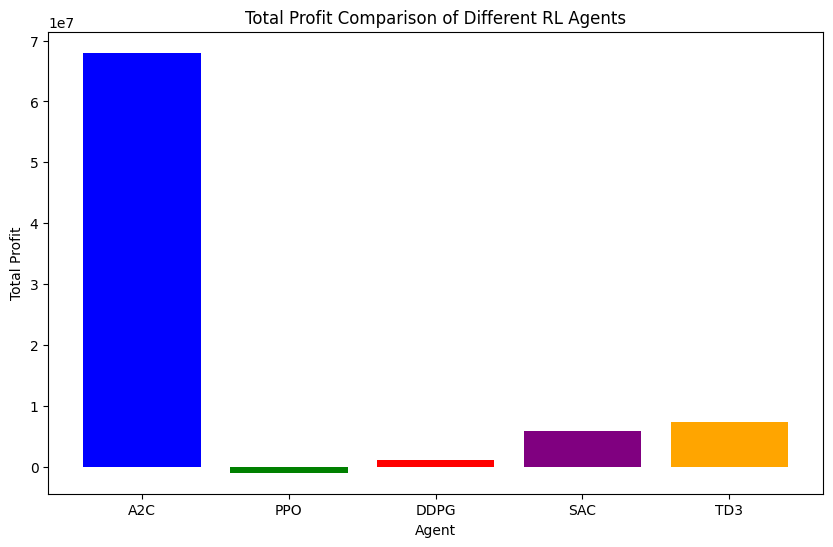

In [60]:
a2c_total_rewards = float(a2c_total_rewards)
ppo_total_rewards = float(ppo_total_rewards)
ddpg_total_rewards = float(ddpg_total_rewards)
sac_total_rewards = float(sac_total_rewards)
td3_total_rewards = float(td3_total_rewards)
agents = ['A2C', 'PPO', 'DDPG', 'SAC', 'TD3']
profits = [a2c_total_rewards, ppo_total_rewards, ddpg_total_rewards, sac_total_rewards, td3_total_rewards]

plt.figure(figsize=(10, 6))
plt.bar(agents, profits, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Total Profit Comparison of Different RL Agents')
plt.xlabel('Agent')
plt.ylabel('Total Profit')
plt.show()